In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
import numpy as np

import torch
from torch import tensor

torch.manual_seed(2019)


print(torch.__version__)
# in version 1.0.0, Tensor is replacing Variable
# e.g torch.randn((3,1), requires_grad = True), tensor(np.array, requires_grad = True)

1.0.0


In [19]:
# define linear model
def linear_model(x, w, b):
    return x * w + b

In [20]:
# MSE
def get_loss(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

In [21]:
# create some x and y values
x_train_np = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train_np = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

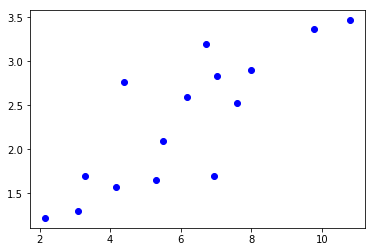

In [22]:
plt.plot(x_train_np, y_train_np, 'bo')

In [23]:
# convert to Tensor
x_train = torch.from_numpy(x_train_np)
y_train = torch.from_numpy(y_train_np)

# or x_train = tensor(x_train_np) # By default, the requires_grad is False

# using GPU:
#x_train = torch.from_numpy(x_train_np).cuda()
#y_train = torch.from_numpy(y_train_np).cuda()

# create w, b
w = torch.randn(1, requires_grad = True) # pytorch version 1.0: requires_grad=True. Tensor is replacing Variable
b = torch.zeros(1, requires_grad = True)

In [24]:
# calculate y_hat
y_hat = linear_model(x_train, w, b)

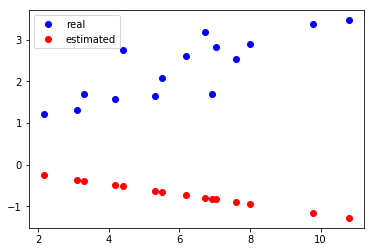

In [25]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
plt.legend()

calculate the error

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

In [26]:
loss = get_loss(y_hat, y_train)
print(loss)

tensor(10.2335, grad_fn=<MeanBackward1>)


定义好了误差函数，接下来我们需要计算 w 和 b 的梯度了，这时得益于 PyTorch 的自动求导，我们不需要手动去算梯度，有兴趣的同学可以手动计算一下，w 和 b 的梯度分别是

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

In [27]:
# calculate the gradiant (automatically)
loss.backward()

# show the gradiant of w 和 b 
print(w.grad)
print(b.grad)

tensor([-41.1289])
tensor([-6.0890])


In [28]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([-41.1289])
tensor([-6.0890])


In [29]:
# update w and b 
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

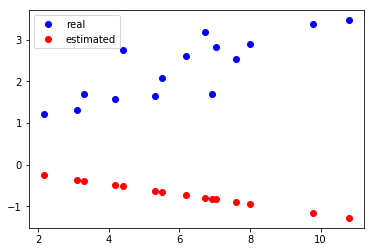

In [30]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
plt.legend()

In [31]:
lr = 1e-2

for e in range(10): # run 10 times
    y_hat = linear_model(x_train, w, b)
    loss = get_loss(y_hat, y_train)
    
    w.grad.zero_() # reset graiant
    b.grad.zero_() # reset graiant
    loss.backward()
    
    w.data = w.data - lr * w.grad.data # 更新 w
    b.data = b.data - lr * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data.item()))
    
    
    
    y_hat = linear_model(x_train, w, b)
    
    #plt.clf()
    #plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
    #plt.plot(x_train.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
    #plt.legend()
    
    #plt.show()
    
    #a = input() # python 3
    # a = raw_input() # python 2

epoch: 0, loss: 0.4142104387283325
epoch: 1, loss: 0.23218491673469543
epoch: 2, loss: 0.2285148650407791
epoch: 3, loss: 0.22814729809761047
epoch: 4, loss: 0.2278423011302948
epoch: 5, loss: 0.22753994166851044
epoch: 6, loss: 0.22723926603794098
epoch: 7, loss: 0.2269400656223297
epoch: 8, loss: 0.2266424000263214
epoch: 9, loss: 0.22634625434875488


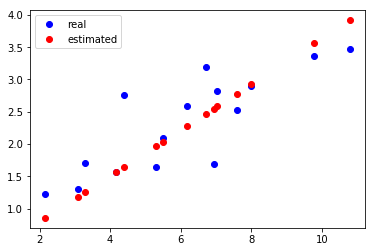

In [32]:
y_hat = linear_model(x_train, w, b)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
plt.legend()

## 多项式回归模型

下面我们更进一步，讲一讲多项式回归。什么是多项式回归呢？非常简单，根据上面的线性回归模型

$$
\hat{y} = w x + b
$$

这里是关于 x 的一个一次多项式，这个模型比较简单，没有办法拟合比较复杂的模型，所以我们可以使用更高次的模型，比如

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$

这样就能够拟合更加复杂的模型，这就是多项式模型，这里使用了 x 的更高次，同理还有多元回归模型，形式也是一样的，只是出了使用 x，还是更多的变量，比如 y、z 等等，同时他们的 loss 函数和简单的线性回归模型是一致的。

In [34]:
# define a polynormial function

w_target = np.array([0.5, 3, 2.4]) # w
b_target = np.array([0.9]) # b

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) 

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


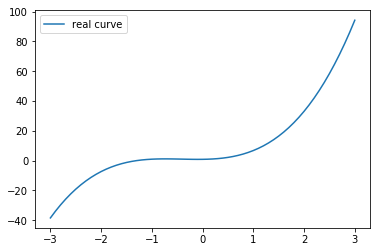

In [35]:
# plot
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [71]:
# create training data
x_training_np = np.stack([x_sample ** i for i in range(1, 4)], axis = 1)
y_training_np = y_sample

x_training = tensor(x_training_np, requires_grad=False)
y_training = tensor(y_training_np, requires_grad=False).unsqueeze(1)

# init w, b
w = torch.randn((3,1), dtype=torch.float64, requires_grad=True)
b = torch.zeros(1, dtype=torch.float64, requires_grad=True)

In [72]:
def multi_linear(x, w, b):
    return torch.mm(x, w) + b

In [73]:
y_hat = multi_linear(x_training, w, b)

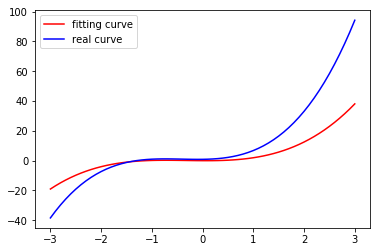

In [77]:
plt.plot(x_training.data.numpy()[:, 0], y_hat.data.numpy(), label='fitting curve', color='r')
plt.plot(x_training.data.numpy()[:, 0], y_training.data.numpy(), label='real curve', color='b')
plt.legend()

In [80]:
loss = get_loss(y_hat, y_training)
print(loss)

tensor(309.8334, dtype=torch.float64, grad_fn=<MeanBackward1>)


In [82]:
# 查看一下 w 和 b 的梯度
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -49.9286],
        [ -72.6702],
        [-327.0057]], dtype=torch.float64)
tensor([-13.8276], dtype=torch.float64)


In [83]:
# 更新一下参数
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

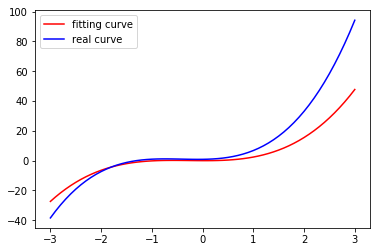

In [84]:
y_hat = multi_linear(x_training, w, b)

plt.plot(x_training.data.numpy()[:, 0], y_hat.data.numpy(), label='fitting curve', color='r')
plt.plot(x_training.data.numpy()[:, 0], y_training.data.numpy(), label='real curve', color='b')
plt.legend()

In [61]:
print(torch.float64)

<class 'torch.dtype'>


In [87]:
# 进行 100 次参数更新
for e in range(100):
    y_hat = multi_linear(x_training, w, b)
    loss = get_loss(y_hat, y_training)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data.item()))

epoch 20, Loss: 4.38411
epoch 40, Loss: 1.17859
epoch 60, Loss: 0.42493
epoch 80, Loss: 0.24368
epoch 100, Loss: 0.19622


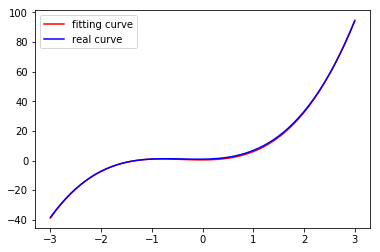

In [89]:
# plot the fitted curve

plt.plot(x_training.data.numpy()[:, 0], y_hat.data.numpy(), label='fitting curve', color='r')
plt.plot(x_training.data.numpy()[:, 0], y_training.data.numpy(), label='real curve', color='b')
plt.legend()